1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [105]:
#author Federico Pilotto 2107076
#imports cell

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.integrate as spi

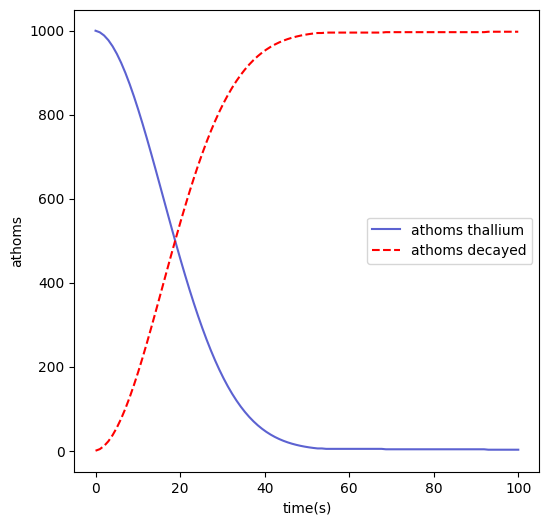

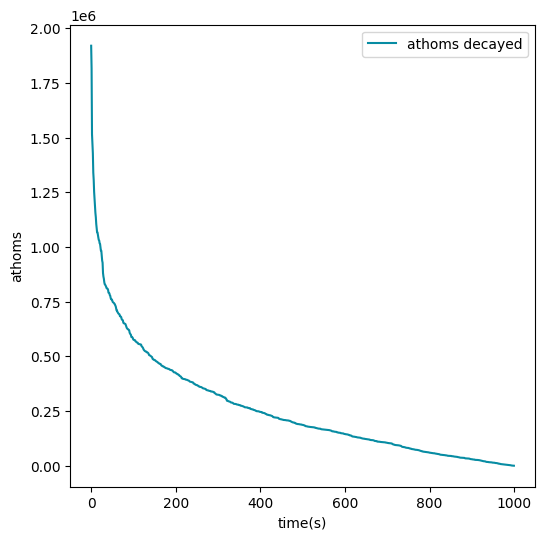

In [106]:
#constants
tau = 3.052*60 #tau in seconds
Tl = 1000 #tallium

#initialization
lead = 0
decayed = np.zeros(100)
athoms = np.zeros(100)
athoms[0] = Tl

#desnity probability function decading of thallium
def pdf_tl(t, tau):
    return 1 - 2**(-t/tau)

def decayed_pdf(t, tau):
    return 2**((-t/tau)*(np.log(2)/tau))

def inv_cdf(y, tau):
    return -tau*np.log2(1-y)


time = np.linspace(0, 100, 100)
for t in range(1, 100):
    prob = pdf_tl(t, tau)
    temp = Tl * prob #decayed athoms in this istant
    if temp > 1:
        lead = lead + temp
        Tl = Tl - temp
        athoms[t] = Tl
        decayed[t] = lead
        #print('Athoms decayed at the istant: ', t, ' numbers', temp)
    else:
        athoms[t] = Tl
        decayed[t] = lead
        #print('Athoms not decayed at the istant ', t)

plt.figure(figsize=(6,6))
plt.plot(time, athoms, '#5c62d1', label='athoms thallium')
plt.plot(time, decayed, 'r--', label='athoms decayed')
plt.xlabel('time(s)')
plt.ylabel('athoms')
plt.legend()
plt.show()

Tl = 1000
rand = np.random.random(1000)
decayed = np.zeros(1000)

for (r, k) in zip(rand, range(1, 1000)):
    prob = inv_cdf(r, tau)
    temp = Tl * prob
    decayed[k] = temp

#descending order
decayed = np.sort(decayed)[::-1]

time = np.arange(0, 1000, 1)

plt.figure(figsize=(6,6))
plt.plot(time, decayed, '#078ca3', label='athoms decayed')
plt.xlabel('time(s)')
plt.ylabel('athoms')
plt.legend()
plt.show()

#to review the last code




2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

/var/folders/3z/zbtjjgm96cdbpj5qjyjcgxl80000gn/T/ipykernel_90534/718878860.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sin(1 / (1-x))**2
/var/folders/3z/zbtjjgm96cdbpj5qjyjcgxl80000gn/T/ipykernel_90534/718878860.py:2: RuntimeWarning: invalid value encountered in sin
  return np.sin(1 / (1-x))**2


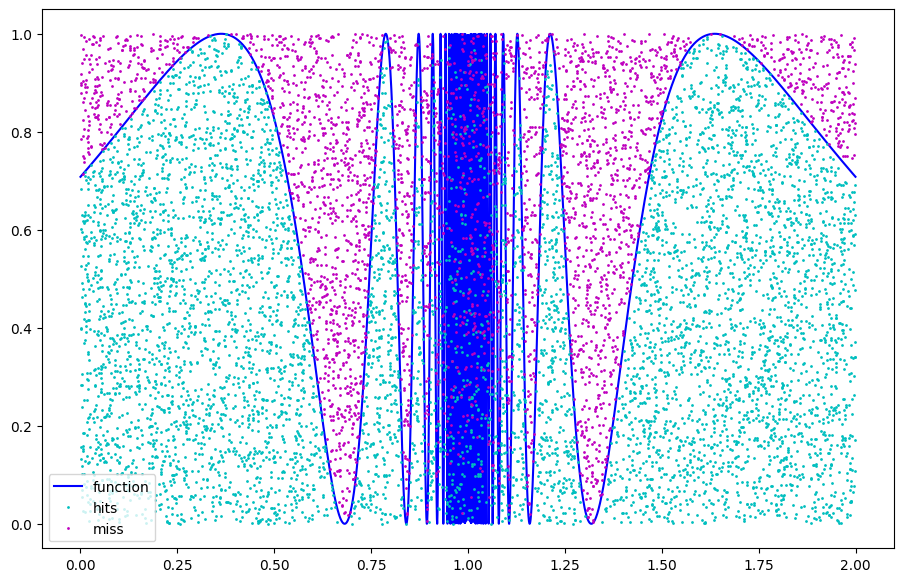

The estimation of the integral is: 1.34
The standard error is:  0.0009566420438178536
The difference from the previous one and the one with 100 repetition mean is :  0.007339999999999902


In [107]:
def f(x):
    return np.sin(1 / (1-x))**2

def integral(N):
    hit = 0
    miss = 0
    a, b = 0, 2
    xh = []
    yh = []
    xm = []
    ym = []
    for i in range(N):
        x = (b-a) * np.random.uniform()
        y = np.random.uniform()
        if y <= f(x):
            hit = hit + 1
            xh.append(x)
            yh.append(y)
        else:
            miss = miss + 1
            xm.append(x)
            ym.append(y)
    estime = (hit/N)*(b-a)
    return (xh, yh, xm, ym, estime)

N = 10000
I = integral(N)
xh, yh, xm, ym, estime1 = I

#plot the integral function
x = np.arange(0, 2, 1/N)
plt.figure(figsize=(11,7))
plt.plot(x, f(x), 'b-', linewidth=1.5, label='function')
plt.plot(xh, yh, 'co', fillstyle='none', markersize=1, label='hits')
plt.plot(xm, ym, 'mo', fillstyle='none', markersize=1, label='miss')
plt.legend()
plt.show()

rep = 100
estimation = np.zeros(rep)
for j in range(rep):
    result = integral(N)
    xh, yh, xm, ym, estime2 = result
    estimation[j] = estime2

mean = np.mean(estimation)
variance = np.var(estimation)
std_error= np.sqrt(variance/rep)

print('The estimation of the integral is:', estime1)
print('The standard error is: ', std_error)
print('The difference from the previous one and the one with 100 repetition mean is : ', abs(mean- estime1))



3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [117]:
#general equation for a sphere in n-dimension
def f(x):
    sum = 0
    for i in range(len(x)):
        sum = sum + x[i]**2
    if sum <= 1:
        return 1
    else:
        return 0

def integral(N, dim):
    results = np.zeros(N)
    x = np.random.uniform(-1, 1, (dim, N))
    for i in range(N):
        results[i] = f(x[:, i])

    I = (2**dim)*np.mean(results)
    return I

#circle
N = 10000
dim1 = 2
I1 = integral(N, dim1)

#10D sphere
N = 10000
dim2 = 10
I2 = integral(N, dim2)

print('The area of the circle is: ', I1)
print('The "volume" of the 10D sphere is: ', I2)

The area of the circle is:  3.1488
The "volume" of the 10D sphere is:  2.1504


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [109]:
def f(x):
    return (x**-0.5)/(np.exp(x) + 1)

def w(x):
    return 1/ np.sqrt(x)

N = 10000

# generate a distribution of random points according to the weight function
x = stats.powerlaw.rvs(0.5, size= N)

#integral of w(x) from 0 to 1
w_val, error = spi.quad(w, 0, 1)

g = f(x)/w(x)
I = (np.sum(g) / N) * w_val

print('The integral with sampling is: ', I)




The integral with sampling is:  0.8412753622086788
